<a href="https://colab.research.google.com/github/Labs123355/hey_world/blob/main/Model_evaluation_for_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!#\usr\bin\env python
'''This the lesson 8 homework DAAN 862 '''
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Task

1.Perform Data exploratory analysis on the data. (10 points)

2.Use 30% of data as the test set and build a Logistic regression model to predict Labels variable. (20 points)

3.Build the Naïve Bayes model to predict Labels variable. (20 points)

4.Build the Decision tree model to predict Labels variable. (20 points)

5.Build Neural network model to predict Labels variable. (20 points)

6.Which model is the best? Which variable is the most important one? (10 points)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DAAN 862 data/breastcancer.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
df.shape

(116, 10)

In [ ]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


<Axes: >

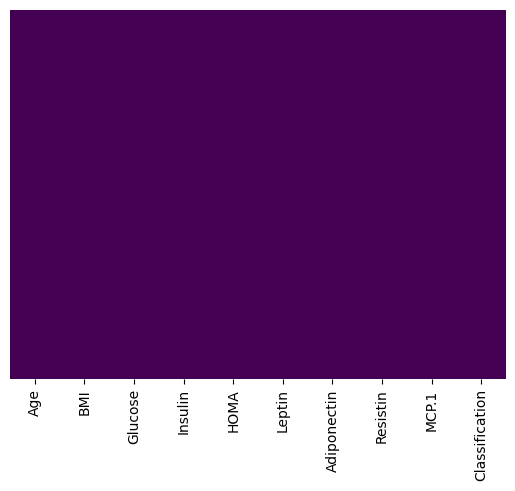

In [ ]:
sns.heatmap(df.isna(), yticklabels=False,cbar=False,cmap='viridis')

This heat map shows no NAN values we know NULL values dont exist due to the values not being NULL.

## EDA


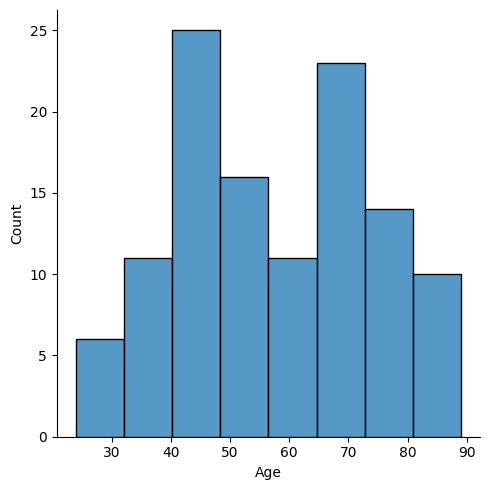

In [ ]:
sns.displot(x= 'Age', data= df)

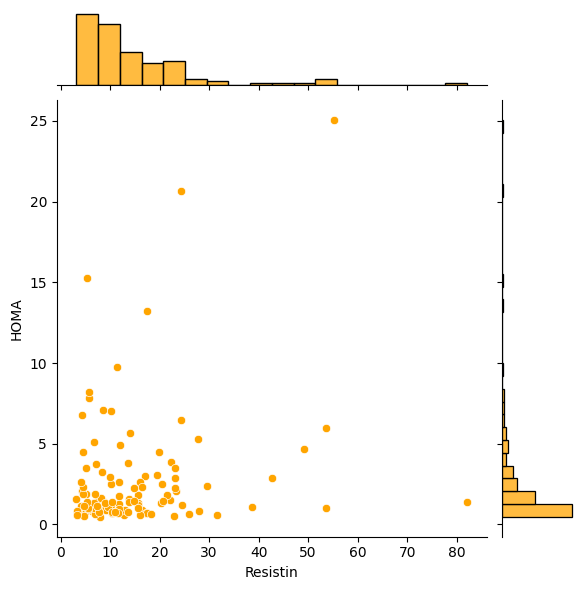

In [ ]:
sns.jointplot(data= df, x= 'Resistin', y= 'HOMA', kind= 'scatter', color= 'orange')

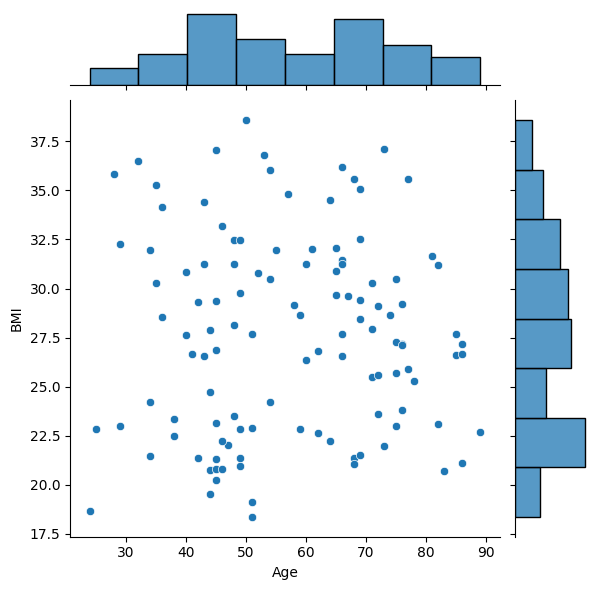

In [ ]:
sns.jointplot(data= df, x='Age', y= 'BMI' , kind= 'scatter')

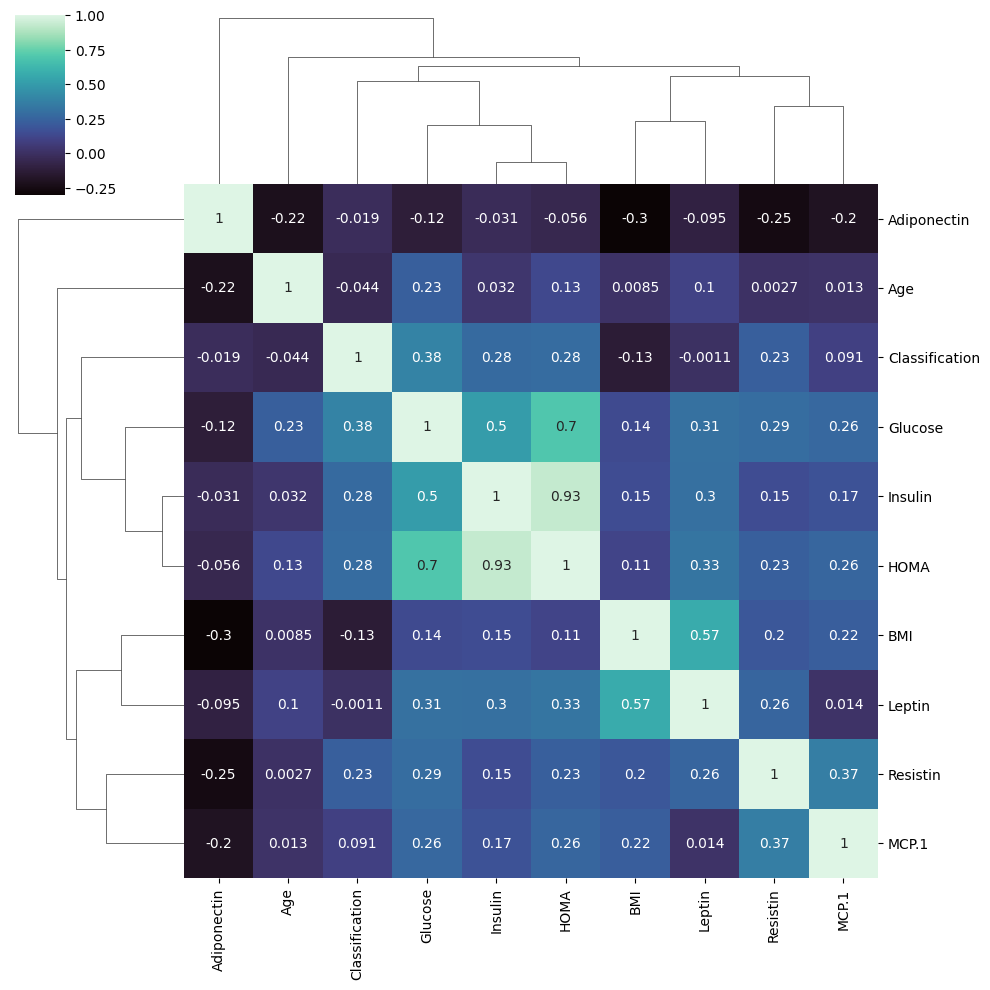

In [ ]:
sns.clustermap(data= df.corr(), annot= True, cmap= 'mako')

#Cluster heatmap groups similar columns together. Makes it easier to see patterns

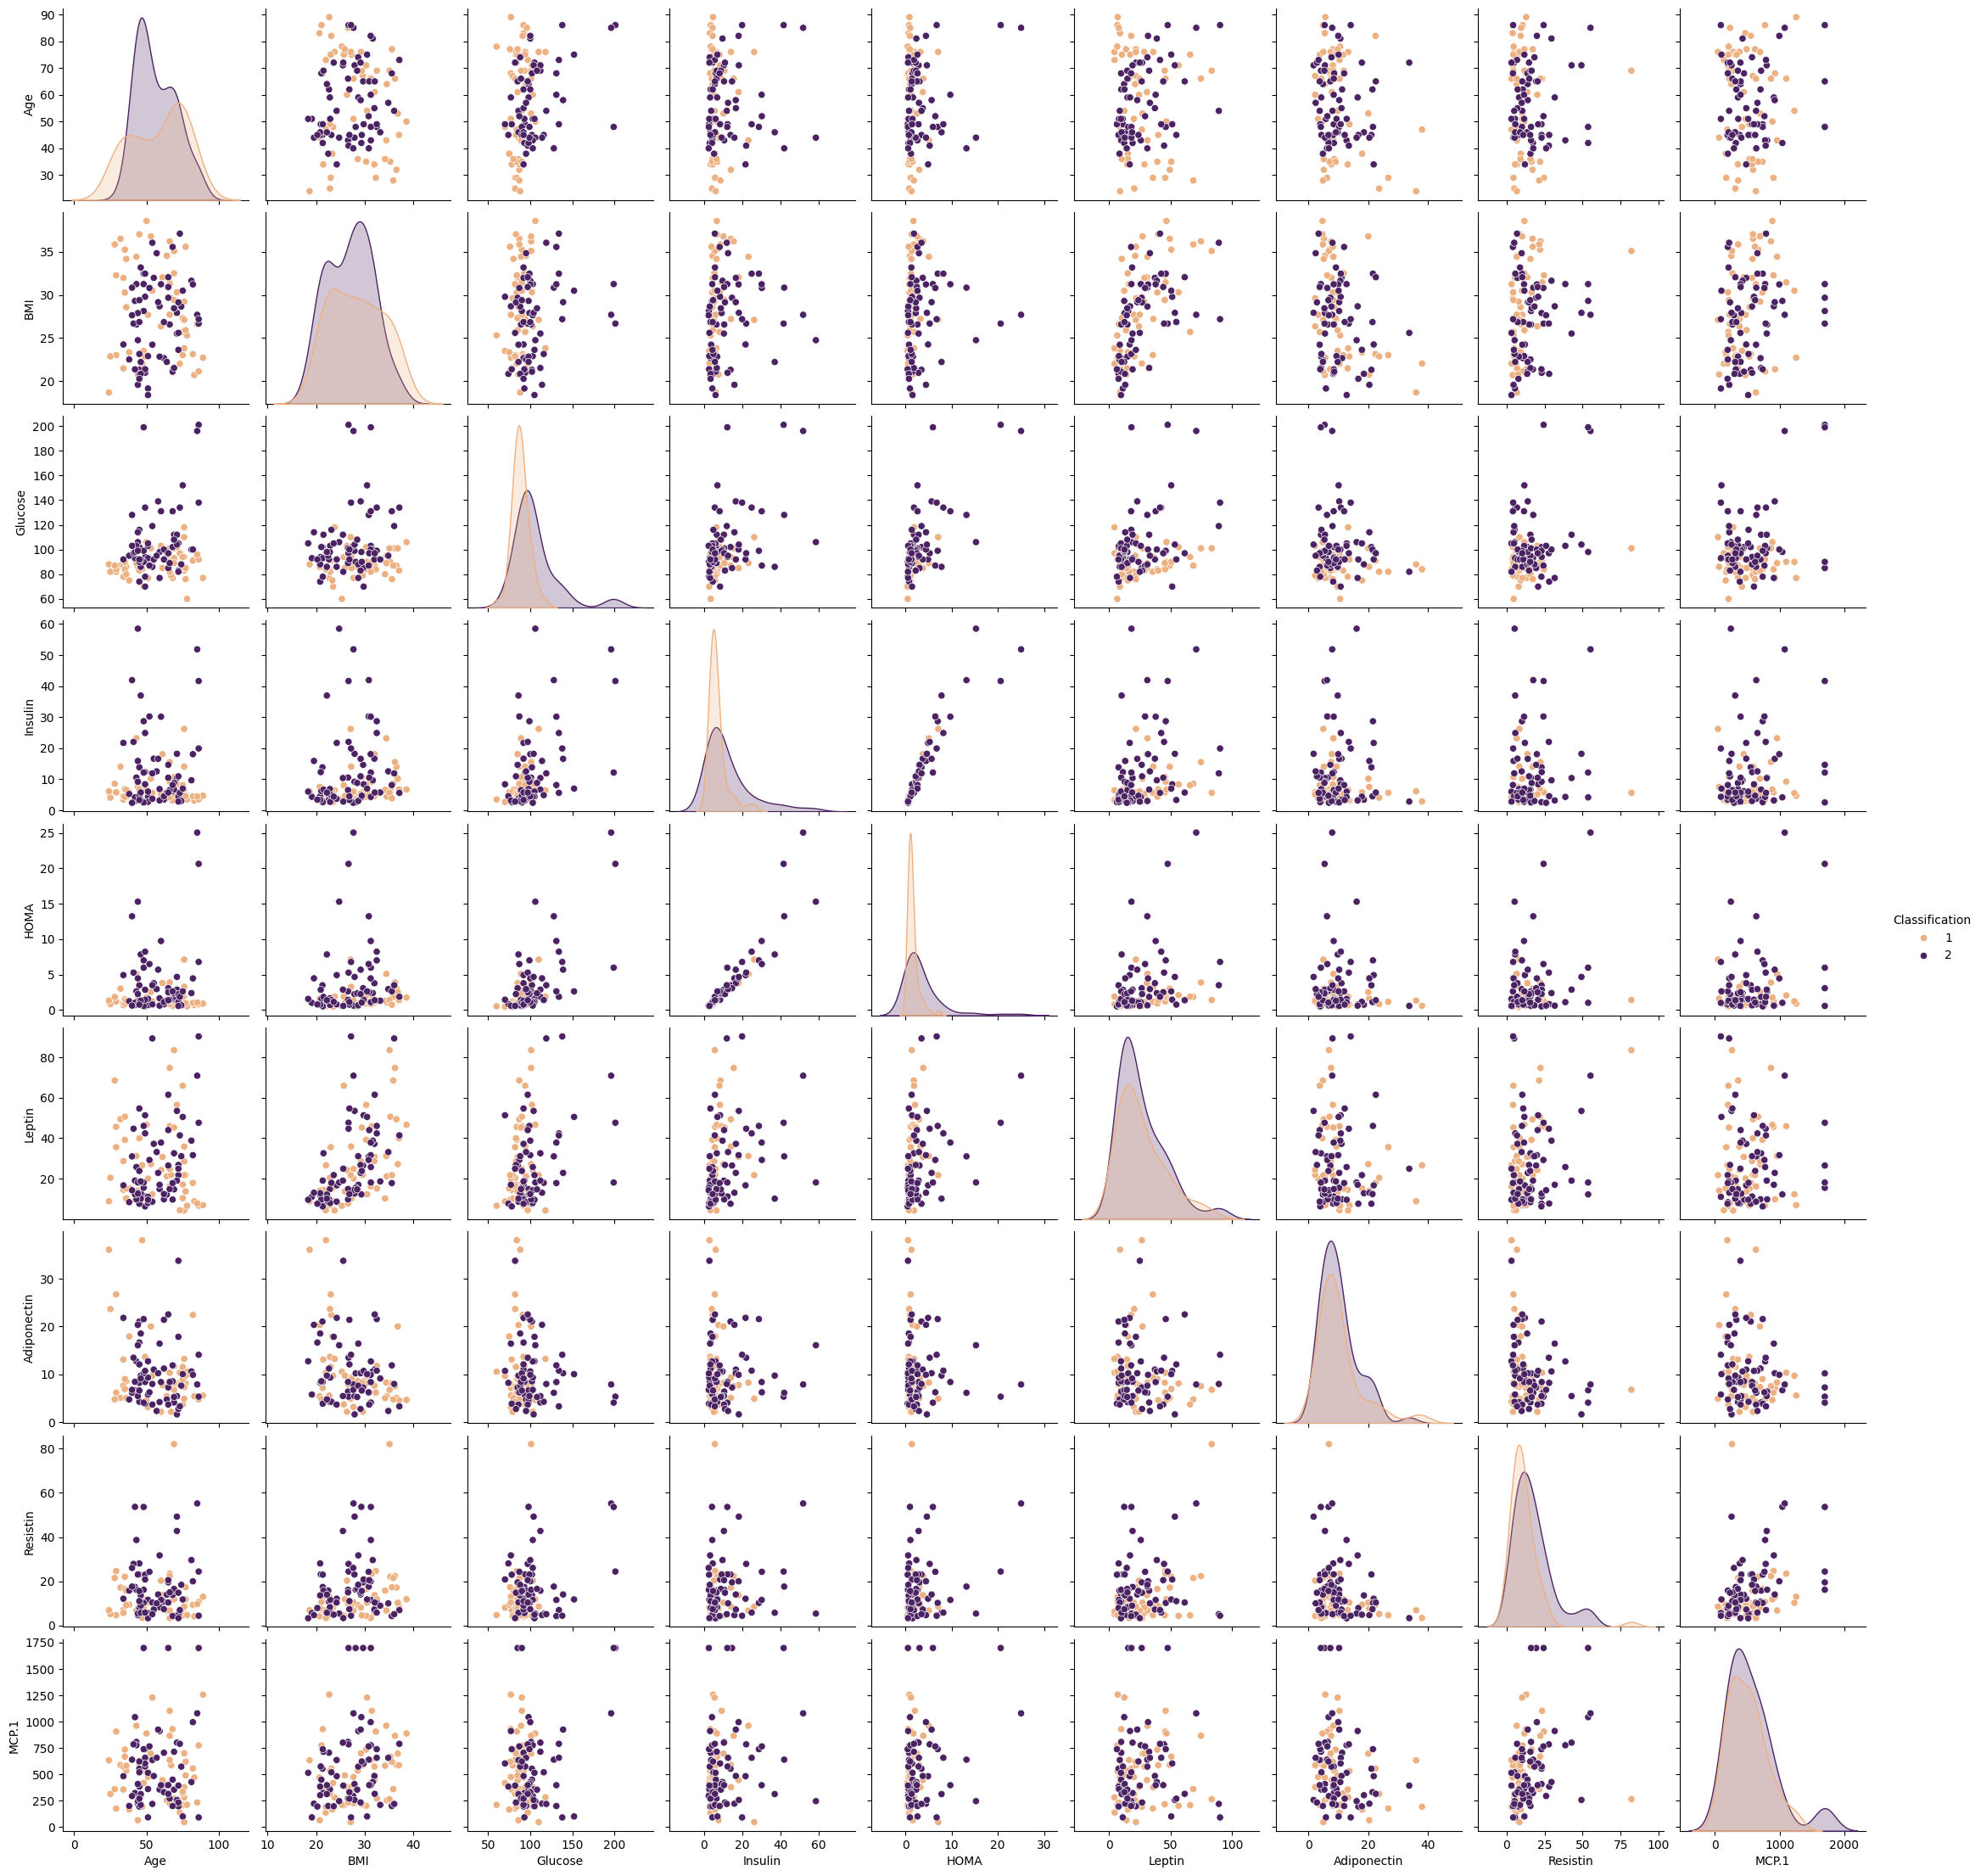

In [ ]:
#this takes a long time prehaps therse a way to speed this up
sns.pairplot(data= df, hue= 'Classification' ,palette= 'flare')

#Train/test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns= 'Classification')
y= df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #random state so we get similar answers dont really matter

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver= 'liblinear' )
logmodel.fit(X_train, y_train)
#predict
log_predictions = logmodel.predict(X_test)

#Evaluation

In [ ]:
#confusion Matrix
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluation(test, pred, name):
  ''' Provides evaluation metrics for a model. Outputs precision, accuracy, recall, and confusion matrix.

      Inputs: test, pred, name
      Outputs: Confusion Matrix, Classification Report, Name of model
  '''

  print(f'Evaluation for {name}\n')
  print(classification_report(test, pred))

  cm = metrics.confusion_matrix(test, pred)
  cm_display = metrics.ConfusionMatrixDisplay(cm)

  cm_display.plot()
  plt.show()


Evaluation for Logistic Regression

              precision    recall  f1-score   support

           1       0.52      0.85      0.65        13
           2       0.86      0.55      0.67        22

    accuracy                           0.66        35
   macro avg       0.69      0.70      0.66        35
weighted avg       0.73      0.66      0.66        35



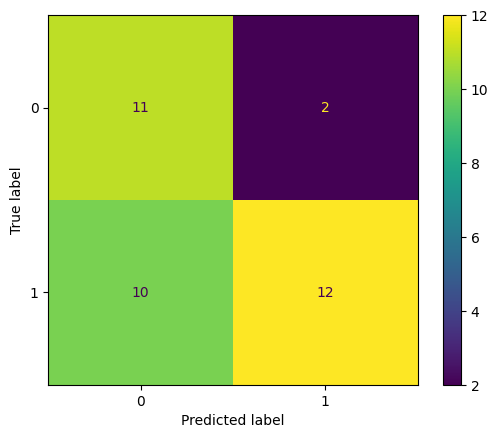

In [ ]:
evaluation(test= y_test, pred= log_predictions, name= 'Logistic Regression')

## Naives Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
NB_predictions = NB.predict(X_test)

##Evaluation

Evaluation for Naives Bayes

              precision    recall  f1-score   support

           1       0.44      0.92      0.60        13
           2       0.88      0.32      0.47        22

    accuracy                           0.54        35
   macro avg       0.66      0.62      0.53        35
weighted avg       0.72      0.54      0.52        35



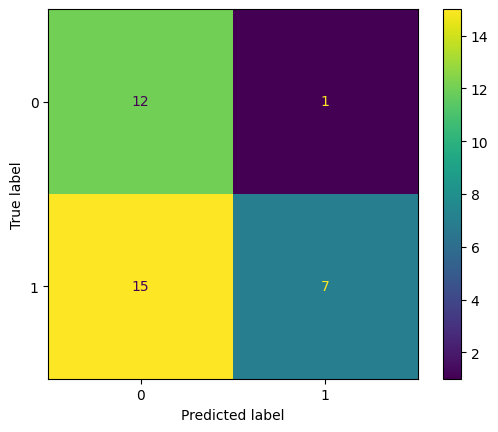

In [ ]:
evaluation(test= y_test, pred= NB_predictions, name= 'Naives Bayes')

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree= DecisionTreeClassifier(criterion= 'gini' )
dTree.fit(X_train, y_train)
dTree_predicitions = dTree.predict(X_test)


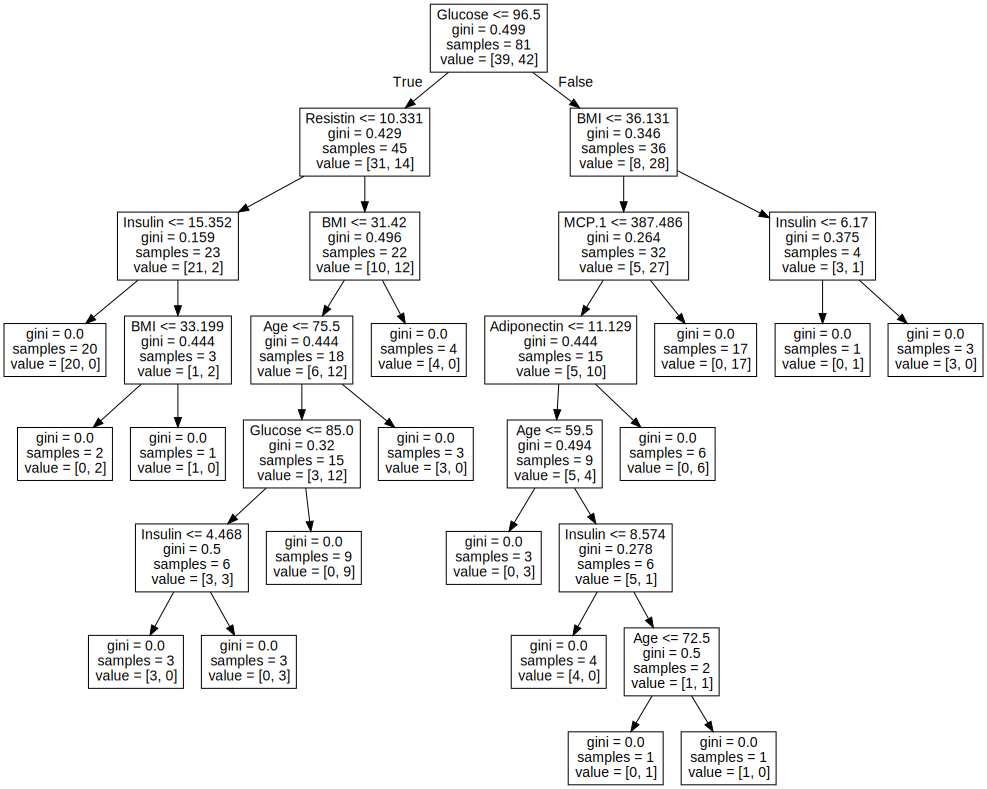

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source


dot_data = tree.export_graphviz(dTree, out_file=None, feature_names= X_train.columns)
graph = Source(dot_data)
graph

##Evaluation

Evaluation for Decision Tree

              precision    recall  f1-score   support

           1       0.60      0.92      0.73        13
           2       0.93      0.64      0.76        22

    accuracy                           0.74        35
   macro avg       0.77      0.78      0.74        35
weighted avg       0.81      0.74      0.75        35



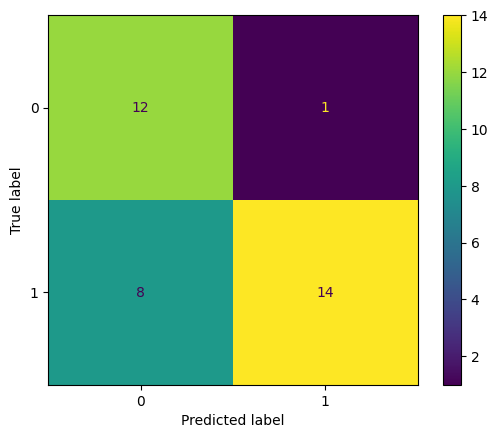

In [ ]:
evaluation(y_test, dTree_predicitions, 'Decision Tree')

## Neural Networks



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #neural networks prefer data from 0-1

X_train_scaled= scaler.fit(X_train).transform(X_train)
#we dont need to fit are test data because we dont use it for our model is what I assume
X_test_scaled= scaler.transform(X_test)

In [ ]:
(X_train[0:3])

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
74,46,22.210000,86,36.940,7.836205,10.1600,9.76000,5.68000,312.000
14,38,23.340000,75,5.782,1.069670,15.2600,17.95000,9.35000,165.020
103,72,29.136316,83,10.949,2.241625,26.8081,2.78491,14.76966,232.018


In [ ]:
X_train_scaled[0:3]


array([[0.33846154, 0.19001662, 0.18439716, 0.61516452, 0.36545543,
        0.06630929, 0.21106341, 0.03130942, 0.16105378],
       [0.21538462, 0.24593297, 0.10638298, 0.05797568, 0.02986915,
        0.12574292, 0.43954257, 0.07782989, 0.07211498],
       [0.73846154, 0.53275496, 0.16312057, 0.15037554, 0.08799226,
        0.26032048, 0.016477  , 0.14652884, 0.11265602]])

In [ ]:
X_test_scaled[0:3]

array([[0.81538462, 0.85200331, 0.11347518, 0.02398069, 0.01290211,
        0.20179816, 0.16546662, 0.1781151 , 0.34638148],
       [0.41538462, 0.03773874, 0.23404255, 0.03261803, 0.0264685 ,
        0.07704929, 0.10080255, 0.02992204, 0.02708283],
       [0.63076923, 0.55899268, 0.17730496, 0.21654149, 0.12914528,
        0.25692344, 0.14195809, 0.20602408, 1.        ]])

In [ ]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier()
NN.fit(X_train_scaled, y_train)
NN_predictions = NN.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluation

Evaluation for Neural Network

              precision    recall  f1-score   support

           1       0.67      0.59      0.62        34
           2       0.65      0.72      0.68        36

    accuracy                           0.66        70
   macro avg       0.66      0.66      0.65        70
weighted avg       0.66      0.66      0.66        70



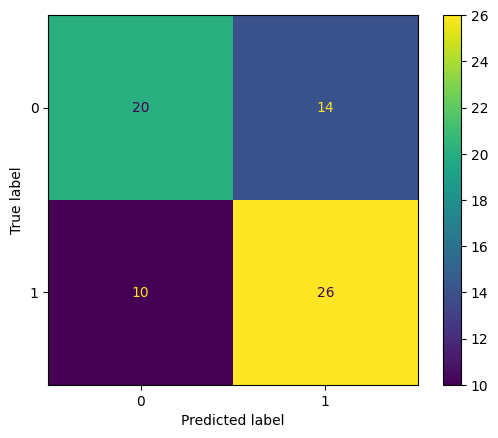

In [ ]:
evaluation(y_test, NN_predictions, 'Neural Network')

In [ ]:
log_scores= []
NB_scores= []
dTree_scores= []
NN_scores= []
test_sizes= np.linspace(0.1, 0.6, 11)

for test_size in test_sizes:

  log_accuracy= []
  NB_accuracy= []
  dTree_accuracy= []
  NN_accuracy= []

  for i in range(30):

      #train/test split
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

      #NB model
      NB.fit(X_train, y_train)
      #add model values to accuracy list
      NB_accuracy.append(NB.score(X_test, y_test))

      #log model
      logmodel.fit(X_train, y_train)
      #add model values to accuracy list
      log_accuracy.append(logmodel.score(X_test, y_test))

      #dTree model
      dTree.fit(X_train, y_train)
      #add model values to accuracy list
      dTree_accuracy.append(dTree.score(X_test, y_test))

      #NN model
      X_train_scaled= scaler.fit(X_train).transform(X_train)

      #we dont need to fit are test data because we dont use it for our model is what I assume
      X_test_scaled= scaler.transform(X_test)
      NN.fit(X_train_scaled, y_train)
      #add model values to accuracy list
      NN_accuracy.append(NN.score(X_test_scaled, y_test))

  log_scores.append(np.mean(log_accuracy))
  NB_scores.append(np.mean(NB_accuracy))
  dTree_scores.append(np.mean(dTree_accuracy))
  NN_scores.append(np.mean(NN_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

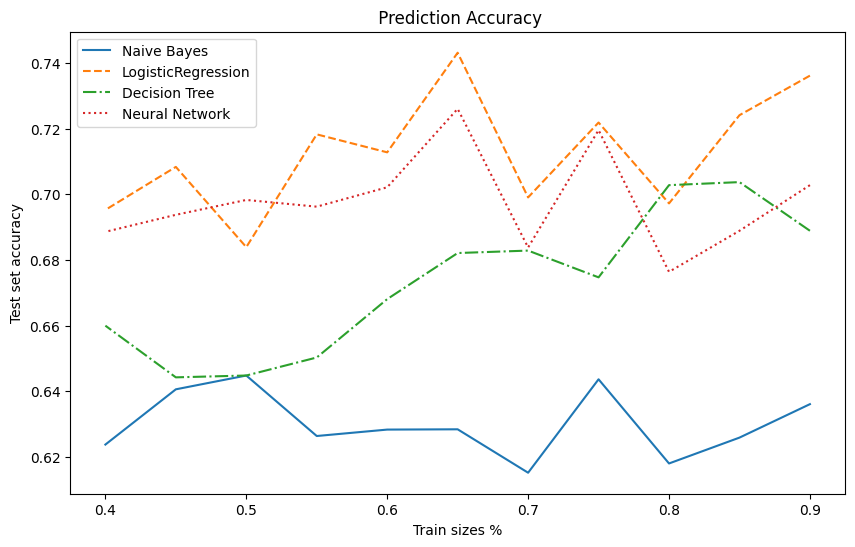

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(1- test_sizes, NB_scores, label='Naive Bayes')
plt.plot(1- test_sizes, log_scores, linestyle='--', label='LogisticRegression')
plt.plot(1- test_sizes, dTree_scores, linestyle='-.', label='Decision Tree')
plt.plot(1- test_sizes, NN_scores, linestyle=':', label='Neural Network')
plt.title(" Prediction Accuracy")
plt.xlabel("Train sizes %")
plt.ylabel("Test set accuracy")
plt.legend()

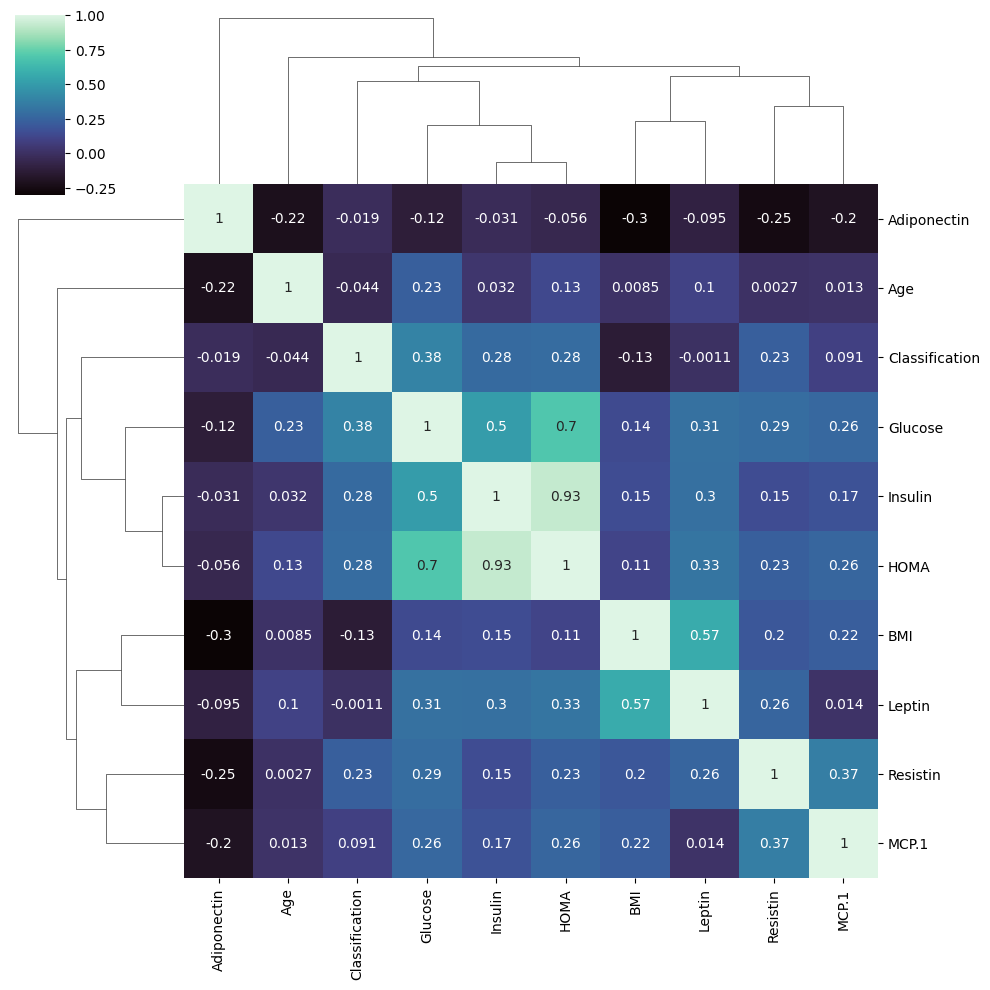

In [ ]:
sns.clustermap(data= df.corr(), annot= True, cmap= 'mako')

## Conclusion

The Logistic Regression model provides the highest accuracy, making it the best model based on this plot. Although it displays significant flunctuations it stays above 0.68 accuracy.

The Decision Tree finds the most important variable. The criterion for selection was the gini index (measure of impurity). The gini being 0.499 indicates a relaitevely high level of impurity. The importance of the variable can be ranked by the tree from top until bottom.

Gluecose is the most important variable when it comes to predicting breast cancer.

Something to note here when we look at our Cluster heatmap Glucose, Insulin and HOMA have the highest relationships with Classification. Resistin is indcated to be fourth. More Research would need to be done to look into the impact of Gluecose on Breast Cancer.